In [1]:
import time as time

# The following import is required
# for 3D projection to work with matplotlib < 3.2

import mpl_toolkits.mplot3d  # noqa: F401

import numpy as np

import scipy
from sklearn.cluster import AgglomerativeClustering


Compute structured hierarchical clustering...
Elapsed time: 0.07s
Number of points: 1500


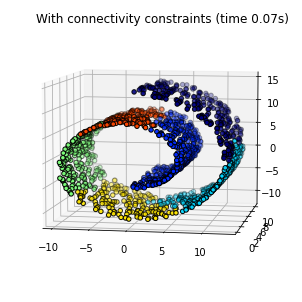

In [2]:
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import kneighbors_graph

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
connectivity

print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

import matplotlib.pyplot as plt
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")

plt.show()

In [3]:
connectivity

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 15000 stored elements in Compressed Sparse Row format>

In [4]:
d_conn = connectivity.todense() #astype()
np.where(d_conn != 0)

(array([   0,    0,    0, ..., 1499, 1499, 1499]),
 array([  20,  186,  242, ...,  851, 1147, 1167]))

In [15]:
d_conn.shape

(1500, 1500)

In [5]:
np.where(d_conn.transpose() != d_conn)

(array([   0,    0,    0, ..., 1499, 1499, 1499]),
 array([186, 798, 846, ..., 154, 184, 251]))

In [6]:
d_conn[0,296]
d_conn[296, 0]

0.0

In [7]:
d_conn

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
d_conn[0,231]

0.0

In [9]:
d_conn[231,0]

0.0

In [10]:
d_conn[np.where(d_conn != 0)]

matrix([[1., 1., 1., ..., 1., 1., 1.]])

## Sample from a square

Compute structured hierarchical clustering...
Elapsed time: 0.00s
Number of points: 50
Compute structured hierarchical clustering...
Elapsed time: 0.20s
Number of points: 50


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 41 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"


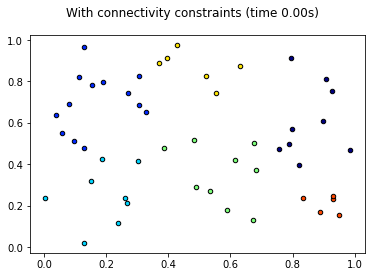

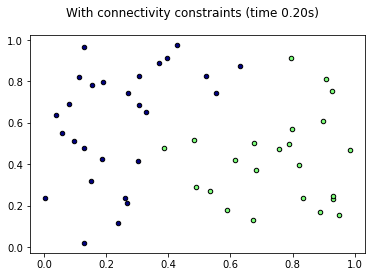

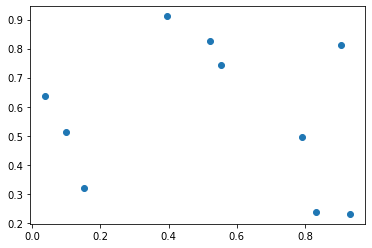

In [38]:
X = np.random.rand(50,2)

from sklearn.cluster import AgglomerativeClustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, linkage="ward" #connectivity=connectivity,
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#ax2 = fig2.add_subplot(1)#, projection="3d", elev=7, azim=-80)
#ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")




## Make first 10 to be connected
connectivity = np.zeros([X.shape[0], X.shape[0]])
connectivity[:10, :10] = 1
#connectivity[0, :10] = 1.0
#connectivity[0,-1] = 1


connectivity = scipy.sparse.csr_matrix(connectivity)
connectivity

print("Compute structured hierarchical clustering...")
st = time.time()
ward2 = AgglomerativeClustering(linkage="ward", connectivity=connectivity).fit(X)
elapsed_time = time.time() - st
label = ward2.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

fig2, ax = plt.subplots()
#ax2 = fig22.add_subplot(1)#, projection="3d", elev=7, azim=-80)
#ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax.scatter(
        X[label == l, 0],
        X[label == l, 1],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")


plt.figure()
plt.scatter(X[:10, 0], X[:10, 1])



In [36]:
X[0,:]

array([0.18129577, 0.1504547 ])

In [35]:
X[-1,:]

array([0.07932211, 0.75554726])

In [30]:
ward2

AgglomerativeClustering(connectivity=<50x50 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>,
                        n_clusters=6)

In [31]:
ward2.labels_

array([1, 3, 2, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 5, 0, 1, 2, 4, 1, 4, 4, 3,
       1, 3, 0, 0, 1, 4, 4, 2, 5, 4, 4, 1, 2, 3, 5, 0, 2, 2, 2, 0, 3, 3,
       2, 3, 4, 1, 2, 0])

In [32]:
ward2.connectivity.todense()

matrix([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
connectivity

<50x50 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [16]:
connectivity.todense().shape

(50, 50)